## Class 36.6 : Section 29: Support Vector Machine
- See handnotes for detailed notes of :
    - SVM concept
    - SVC Hard Margin, constraints, loss function and converting solution to dual form using Lagrangian
    - Kernels - Concept and different types of kernels - Radial Basis Function (RBF), Polynomial, Linear 
    - SVC Soft Margin, constraints, loss function and converting solution to dual form using Lagrangian
    - SVC Multiclass classification
    - SVR, constraints, loss function and converting solution to dual form using Lagrangian
    - One class SVM concept - for anomaly detection

### Class 36.6.7 : Understanding how to solve contrained optimization problem by CampusX

In [ ]:
# For printing markdown content - run the following code and then printout

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

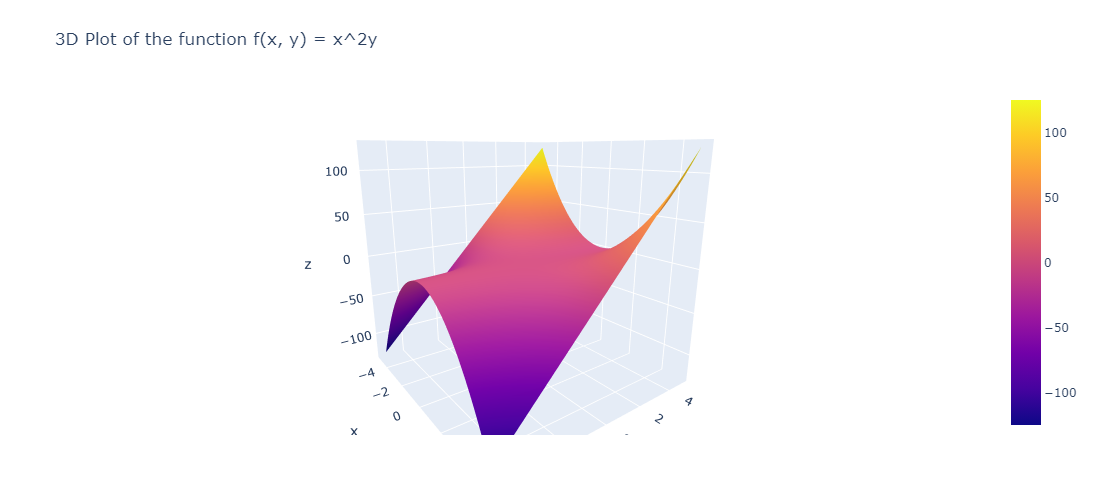

In [1]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = x**2 * y

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='3D Plot of the function f(x, y) = x^2y', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


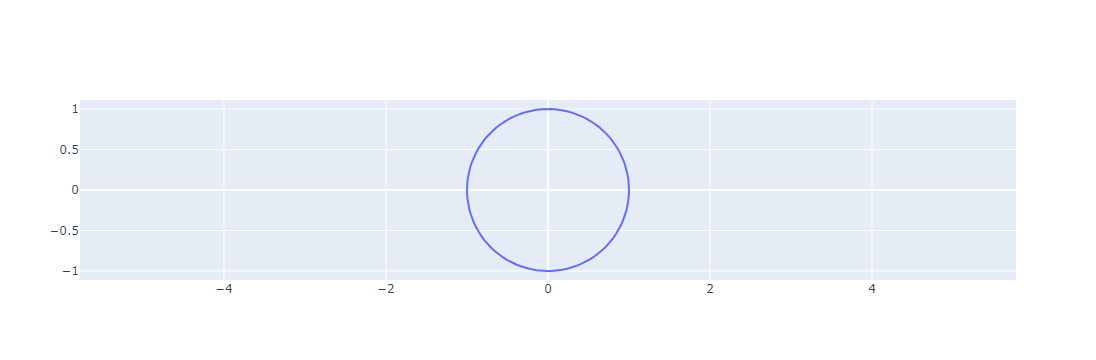

In [2]:
import plotly.graph_objects as go
import numpy as np

# Create a set of points that lie on the circle
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# Create the plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))

# Set the aspect ratio to equal so the circle doesn't look like an ellipse
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()


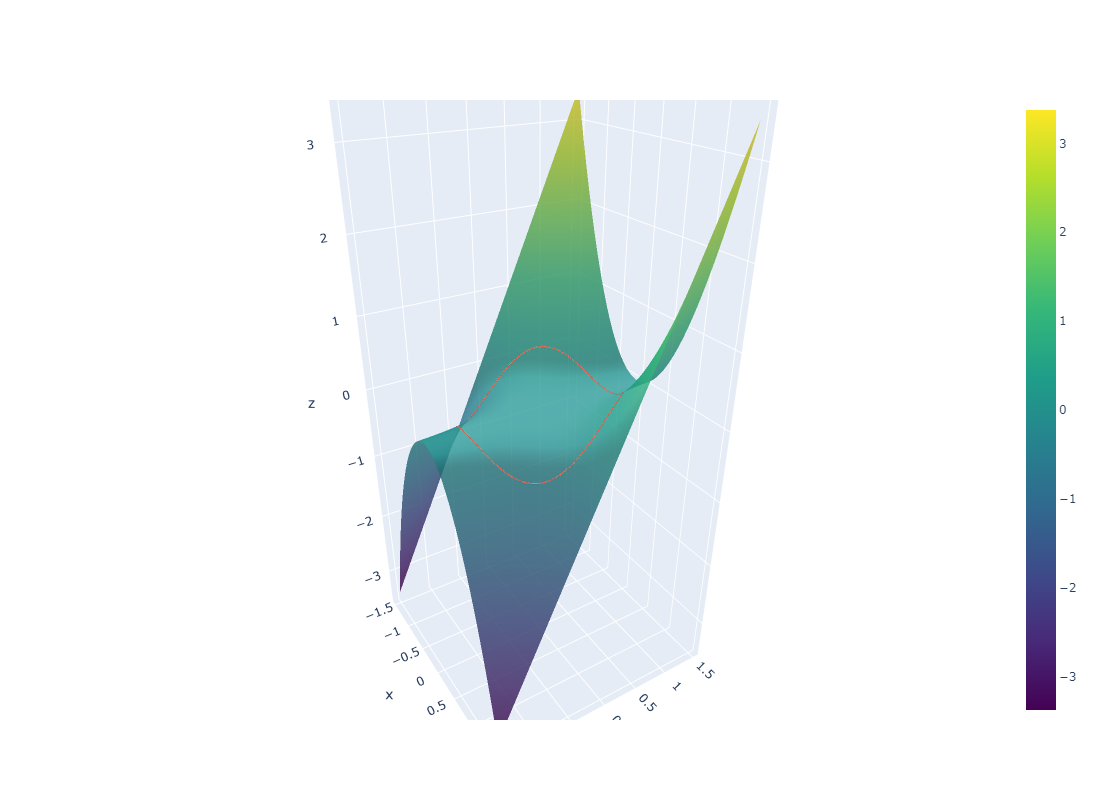

In [12]:
import plotly.graph_objects as go
import numpy as np

# Create grid for the function
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = x**2 * y

# Create a set of points that lie on the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
z_circle = x_circle**2 * y_circle

# Create the surface plot for the function
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis', opacity=0.8)])

# Add the circle to the plot
fig.add_trace(go.Scatter3d(x=x_circle, y=y_circle, z=z_circle, mode='lines'))
fig.update_layout(autosize=False,
                  width=800, height=800)

fig.show()


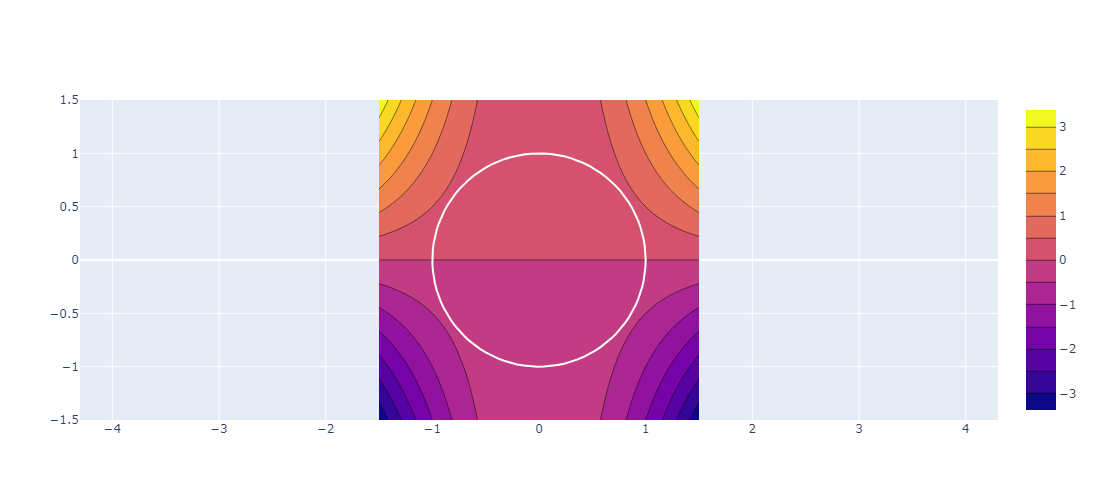

In [4]:
import plotly.graph_objects as go
import numpy as np

# Create grid for the function
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)
z = x**2 * y

# Create a set of points that lie on the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Create the contour plot for the function
fig = go.Figure(data=go.Contour(x=x[0,:], y=y[:,0], z=z))

# Add the circle to the plot
fig.add_trace(go.Scatter(x=x_circle, y=y_circle, mode='lines', line=dict(color='white')))

# Set aspect ratio
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(scaleanchor="x", scaleratio=1),
)

fig.show()


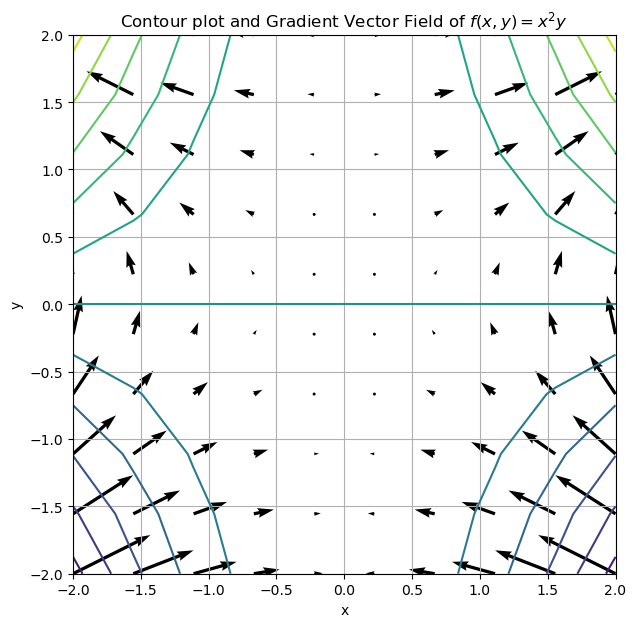

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)

# Compute the function values
Z = X**2 * Y

# Compute the gradient
U = 2*X*Y
V = X**2

plt.figure(figsize=(7, 7))

# Draw the contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Draw the gradient vector field
plt.quiver(X, Y, U, V)

plt.title('Contour plot and Gradient Vector Field of $f(x, y) = x^2y$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


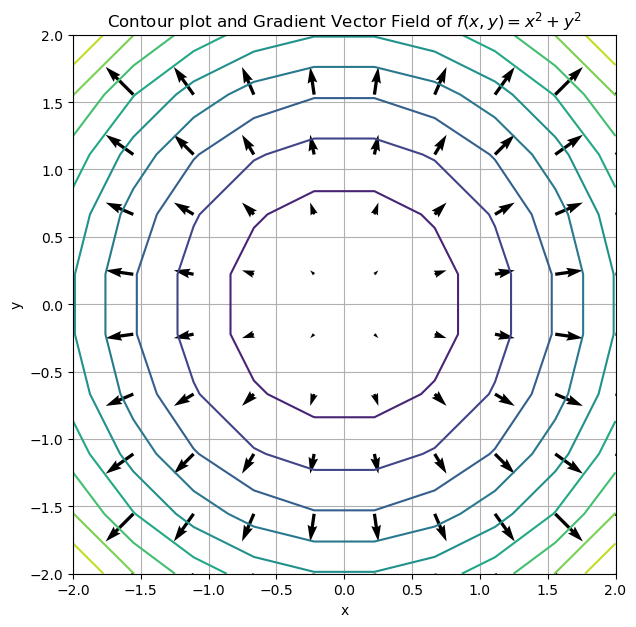

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)

# Compute the function values
Z = X**2 + Y**2

# Compute the gradient
U = 2*X
V = 2*Y

plt.figure(figsize=(7, 7))

# Draw the contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Draw the gradient vector field
plt.quiver(X, Y, U, V)

plt.title('Contour plot and Gradient Vector Field of $f(x, y) = x^2 + y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


## Class 36.6 : Section 29: Support Vector Machine
### 188. : Code for Support Vector Classifier - from Krish Naik Udemy course

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='0', ylabel='1'>

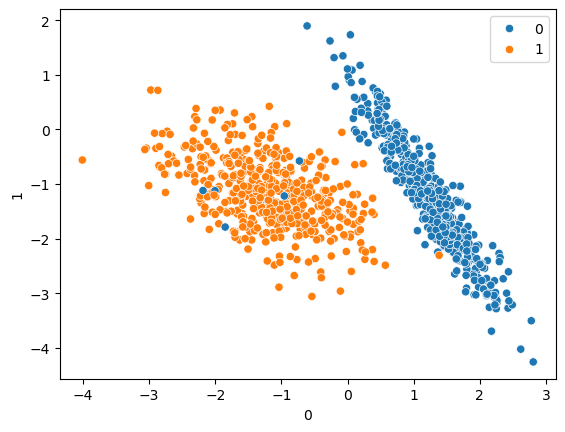

In [38]:
## Creating synthetic datapoints
from sklearn.datasets import make_classification
X,y=make_classification(n_samples = 1000, n_features = 2, n_classes=2,n_clusters_per_class=1,n_redundant=0,class_sep=1.2)
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) ## Accuracy is 100% with linear kernel as data is clearly separable

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       130
           1       0.97      1.00      0.98       120

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[126   4]
 [  0 120]]


### Testing overlapping data on linear kernel

<Axes: xlabel='0', ylabel='1'>

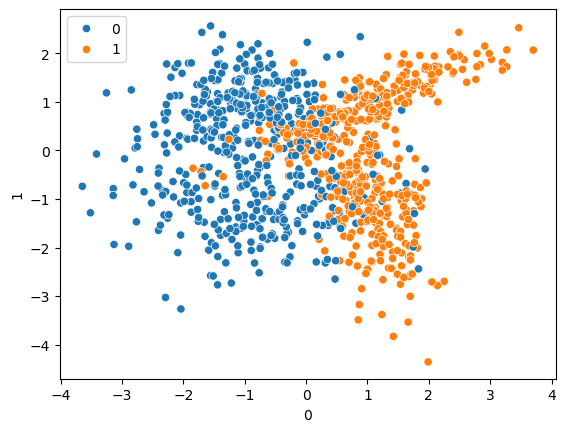

In [41]:
## Creating synthetic datapoints
from sklearn.datasets import make_classification
X,y=make_classification(n_samples = 1000, n_features = 2, n_classes=2,n_clusters_per_class=2,n_redundant=0)
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) ## Now the accuracy is bad with linear kernel

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       122
           1       0.87      0.88      0.88       128

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[105  17]
 [ 15 113]]


In [62]:
print(svc.coef_) # Works only for linear kernel
print(svc.intercept_) # Works only for linear kernel
print(svc.n_support_) # number of support vector for each class
svc.support_vectors_ # list of all support vectors

[[1.74913132 0.11911051]]
[-0.1775795]
[120 119]


array([[ 5.55496971e-01,  1.97824597e+00],
       [-9.63557527e-02,  4.58273223e-02],
       [-2.61592832e-02, -1.32415978e+00],
       [ 5.59933135e-01,  1.15380960e+00],
       [ 5.43072988e-01, -1.28216012e+00],
       [ 3.73281457e-01, -1.49080964e+00],
       [-1.82960728e-01,  1.45583003e+00],
       [-3.51880272e-01,  1.00858813e+00],
       [-2.32323609e-01, -1.96160210e+00],
       [ 6.29054985e-02,  7.57069303e-01],
       [-1.52980724e-01, -6.93271944e-01],
       [-2.88153746e-01, -1.68615137e+00],
       [-5.15710072e-01,  1.55560224e+00],
       [-2.36470313e-01, -1.07972159e-01],
       [ 9.52976752e-02,  1.03776608e+00],
       [ 4.72804236e-03,  4.75726438e-01],
       [ 5.63353535e-01, -1.60702884e+00],
       [-2.17594314e-01,  1.02950434e+00],
       [ 1.86273653e-01, -1.76259302e+00],
       [-3.84584558e-01, -1.16392428e+00],
       [ 3.25243822e-01, -9.51014354e-01],
       [ 3.89010929e-01, -7.41983565e-01],
       [-1.11282666e-01,  8.00795270e-01],
       [ 2.

### Using RBF kernel for the above data

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1000)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) ## Now the has improved slightly

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       122
           1       0.89      0.91      0.90       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[107  15]
 [ 11 117]]


In [70]:

print(svc.n_support_) # number of support vector for each class
svc.support_vectors_ # list of all support vectors

[87 89]


array([[ 5.55496971e-01,  1.97824597e+00],
       [-9.63557527e-02,  4.58273223e-02],
       [ 5.59933135e-01,  1.15380960e+00],
       [ 5.43072988e-01, -1.28216012e+00],
       [ 3.73281457e-01, -1.49080964e+00],
       [ 6.29054985e-02,  7.57069303e-01],
       [-2.36470313e-01, -1.07972159e-01],
       [-5.23029155e-01,  2.22354789e-01],
       [ 9.52976752e-02,  1.03776608e+00],
       [ 4.72804236e-03,  4.75726438e-01],
       [ 5.63353535e-01, -1.60702884e+00],
       [ 3.25243822e-01, -9.51014354e-01],
       [ 3.89010929e-01, -7.41983565e-01],
       [-2.06265538e+00, -4.22918009e-01],
       [-1.11282666e-01,  8.00795270e-01],
       [-3.47946696e-02,  6.54299679e-01],
       [-3.64025183e-01,  4.22379798e-02],
       [ 1.83222092e+00, -2.43975578e+00],
       [ 2.03498582e-01, -9.42290940e-01],
       [ 4.06801658e-01, -1.27858921e-01],
       [-4.44136669e-01,  1.59482998e-02],
       [ 1.53076911e+00, -8.79653345e-01],
       [ 1.16563023e+00, -1.00052546e-01],
       [ 4.

### Using polynomial kernel

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=5)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) ## Polynomial is not working so well

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       122
           1       0.87      0.84      0.85       128

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[106  16]
 [ 21 107]]


### Using sigmoid kernel

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) ## Sigmoid is bad

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       122
           1       0.79      0.73      0.76       128

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250

[[98 24]
 [35 93]]


## Hyperparameter tuning with SVC

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','poly']}

grid=GridSearchCV(SVC(),param_grid=param_grid, cv=5, verbose = 3,refit=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.860 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.847 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [55]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [57]:
y_pred=grid.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       122
           1       0.87      0.91      0.89       128

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[105  17]
 [ 12 116]]


## Class 36.6 : Section 29: Support Vector Machine
### 189. : Code for Kernels - from Krish Naik Udemy course

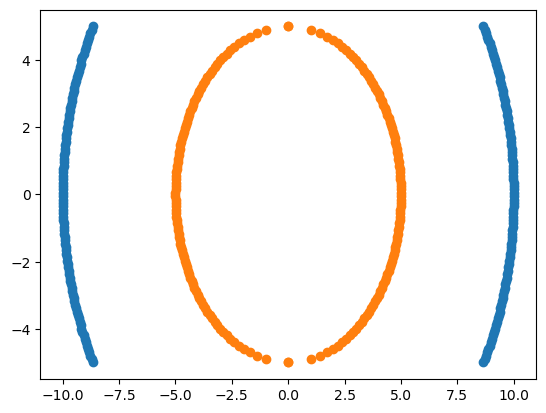

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-5,5,100)
y=np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1=np.linspace(-5,5,100)
y1=np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

plt.scatter(y,x)
plt.scatter(y1,x1)

In [79]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1,df2],axis=0)
df.head(5)

### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Polynomial Kernel
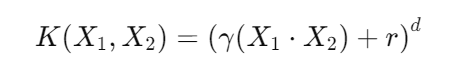

### Visualizing how data looks in higher dimension - to understand how poly kernel works

In [81]:
# Creating X1,X2,X1_square,X2_square,X1*X2 components of poly kernel
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

X1       X2  Y  X1_Square  X2_Square      X1*X2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

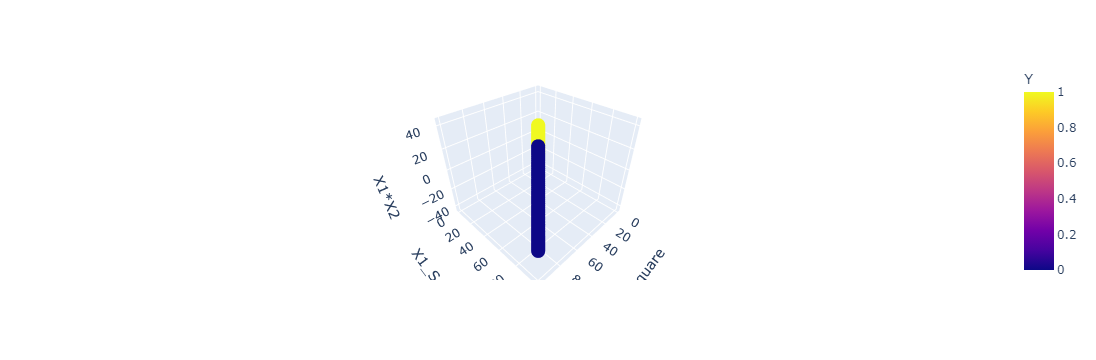

In [84]:
## notice that the data has become separable using hyperplane in this dimension ... This is what kernels do - 
## they calculate the hyperplane in this higher dimension without actually going to the dimension - i.e. we do not need to calculate
## x1^2, x2^2, x1*x2 for all data points. That is beauty of SVM kernels 
import plotly.express as px

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

### Applying Linear kernel on original data results in poor accuracy - as data is not linearly separable

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

### Applying Linear kernel on data in higer dimension results in very good accuracy

In [86]:
### Independent and Dependent features
X1 = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y1 = df['Y']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X1_train, y1_train)
y1_pred = classifier.predict(X1_test)
accuracy_score(y1_test, y1_pred)

1.0

### Kernels do the transformations internally, we dont have to actually do the transformations in dataframe. 

### Actually, kernels dont even do the transformations for all the points, its a trick, where the dot product of two vectors ( which is a scalar value ) in higher dimension can be calculated using dot product of two vectors in lower dimension .. and doing a mathematical operation with it. 

### E.g. in Poly kernel, ( 1 + X1.X2)^2 ... will give the result of dot product of the vectors in higher dimension ... and calculating X1.X2 is very easy in lower dimension ... and taking their square is also very easy ... so we dont have to calculate all the components X1^2, X2^2, X1*X1, etc 

### Trying out different kernels

In [92]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly",degree=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.51

### Radial Basis Function RBF Kernel - RBF kernel
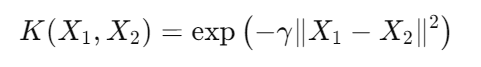

- RBF kernel equation is similar to gaussian distribution formula ... gamma = 1/(2 sigma^2) ...
- gamma is inversely proportional to sigma ... and sigma defines the confidence interval ( 99% within +- 2 sigma )
- So sigma is like radius of influence
- As gamma increases, sigma decreases ... radius decreases .. so the influence of support vector reduces .. so small circle will form around support vectors as the boundaries ... it will overfit
- Gamma in poly kernel also behaves similarly .. i.e. as gamma increases, model overfits
- Gamma is invesely proportional to lambda ( regularization param ) ... as lambda increases, model underfits ( as it makes beta 0 ) .. i.e. gamma decreases

## Class 36.6 : Section 29: Support Vector Machine
### 190. : Support Vector Regression implementation - from Krish Naik Udemy course

In [96]:
## Dataset (Tips Dataset)
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [98]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [99]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [100]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [101]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [102]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [125]:
## independnent and dependent features
X=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

X_train.head()

tip   sex smoker  day    time  size
58   1.76  Male    Yes  Sat  Dinner     2
1    1.66  Male     No  Sun  Dinner     3
2    3.50  Male     No  Sun  Dinner     3
68   2.01  Male     No  Sat  Dinner     2
184  3.00  Male    Yes  Sun  Dinner     2

In [126]:
## Feature Encoding(LAbel Encoding And Onehot Encoding)
## Sex, Smoker and Time have only 2 labels ... so we are using label encoding to convert one lable to 0 and other to 1 .. order does not matter
from sklearn.preprocessing import LabelEncoder

# Important to define different object for each feature
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

X_train.head()

tip  sex  smoker  day  time  size
58   1.76    1       1  Sat     0     2
1    1.66    1       0  Sun     0     3
2    3.50    1       0  Sun     0     3
68   2.01    1       0  Sat     0     2
184  3.00    1       1  Sun     0     2

In [127]:
# Applying transformation on Test data
X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

In [128]:
## Onehot encoding--- applying for day variable as it has multiple values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Day is in 3rd index ... drop = first drops the first one hot encoded feature ... to avoid dummy variable trap
## remainder = drop means that only transformed features of day will be kept ... rest all other vars - sex, smoker, time will be dropped
## remainder = passthrough means all will be kept
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],
                                   remainder='passthrough')

import sys
import numpy
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

pd.DataFrame(X_train).head() # notice that the first 3 elements are the one hot encoded values

0    1    2     3    4    5    6    7
0  1.0  0.0  0.0  1.76  1.0  1.0  0.0  2.0
1  0.0  1.0  0.0  1.66  1.0  0.0  0.0  3.0
2  0.0  1.0  0.0  3.50  1.0  0.0  0.0  3.0
3  1.0  0.0  0.0  2.01  1.0  0.0  0.0  2.0
4  0.0  1.0  0.0  3.00  1.0  1.0  0.0  2.0

In [129]:
## SVR--Support Vector Regression
from sklearn.svm import SVR
svr=SVR()

svr.fit(X_train,y_train)

y_pred=svr.predict(X_test)

from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.4602811456115927
4.1486423210190235


In [130]:
## Hyperparameter Tuning using GridSearch CV

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [131]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [132]:
grid_prediction=grid.predict(X_test)

from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5081618245078687
3.8685147526100234
